In [3]:
import numpy as np
from cdo import *
cdo = Cdo()
from os import getenv
import time

HOME = getenv('HOME')

bbox_cdo = '-20,20,-20,20'
bbox_ocgis = [-20,-22,20,20]

# global dataset CMIP5
resources = '/home/estimr2/EUCLEIA/ftp.ceda.ac.uk/badc/eucleia/data/EUCLEIA/output/MOHC/HadGEM3-A-N216/historical/day/atmos/day/r1i1p1/latest/psl_day_HadGEM3-A-N216_historical_r1i1p1_20100101-20131230.nc'

In [4]:
# get the North Atlanic region form global dataset with cdo
tic = time.time()
nc  = cdo.sellonlatbox( bbox_cdo, input=resources, output=HOME+'/data/tests/subset.nc' )
tac = time.time()
print 'sec: %s' % (tac-tic)

sec: 121.710592985


In [5]:
# read in the file
from netCDF4 import Dataset, num2date
from flyingpigeon.utils import get_variable

var = get_variable(nc)
#print 'variable name: %s' % var
ds = Dataset(nc)
psl = ds.variables[var]
lat = ds.variables['lat']
lon = ds.variables['lon']

/homel/nhempel/.conda/envs/flyingpigeon/lib/python2.7/site-packages/ocgis/util/environment.py:33: UserWarning: Consider setting the system environment variable "GDAL_DATA=/homel/nhempel/.conda/envs/flyingpigeon/share/gdal" to improve load performance
  warn(msg)


In [6]:
print lon[:]

[-19.58334145 -18.75000814 -17.91667482 -17.08334151 -16.2500082
 -15.41667488 -14.58334157 -13.75000826 -12.91667494 -12.08334163
 -11.25000831 -10.416675    -9.58334169  -8.75000837  -7.91667506
  -7.08334175  -6.25000843  -5.41667512  -4.58334181  -3.75000849
  -2.91667518  -2.08334187  -1.25000855  -0.41667524   0.41666666
   1.24999997   2.08333328   2.9166666    3.74999991   4.58333322
   5.41666654   6.24999985   7.08333316   7.91666648   8.74999979
   9.5833331   10.41666642  11.24999973  12.08333305  12.91666636
  13.74999967  14.58333299  15.4166663   16.24999961  17.08333293
  17.91666624  18.74999955  19.58333287]


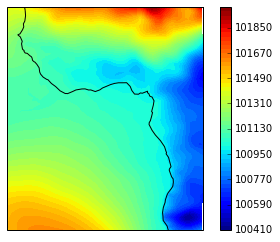

In [7]:
from matplotlib import pyplot as plt
from cartopy import config
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from numpy import meshgrid
# to show the plots inline
%matplotlib inline

lons, lats = meshgrid(lon, lat)

# plot first time stepp:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
ax.coastlines()
cs = plt.contourf(lons, lats, psl[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='nearest')
plt.colorbar()


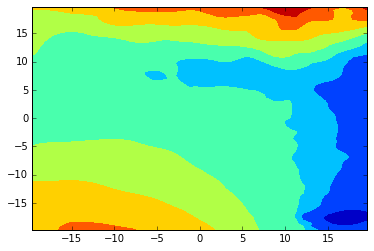

In [8]:
cs = plt.contourf(lons, lats, psl[0,:,:])

In [9]:
# same stepps with ocgis
from flyingpigeon.ocgis_module import call 

tic = time.time()
#from ocgis import RequestDataset ,OcgOperations
spatial_wrapping = 'wrap' # unwrap # None
nc = call(resources, geom=bbox_ocgis, spatial_wrapping=spatial_wrapping, dir_output=HOME+'/data/tests')
tac = time.time()
print 'sec: %s' % (tac-tic)

sec: 1452.59325314


In [10]:
#read in the data 
var = get_variable(nc)
#print 'variable name: %s' % var
ds = Dataset(nc)
psl = ds.variables[var]
lat = ds.variables['lat']
lon = ds.variables['lon']

In [11]:
print lon[:]

[-19.58334145 -18.75000814 -17.91667482 -17.08334151 -16.2500082
 -15.41667488 -14.58334157 -13.75000826 -12.91667494 -12.08334163
 -11.25000831 -10.416675    -9.58334169  -8.75000837  -7.91667506
  -7.08334175  -6.25000843  -5.41667512  -4.58334181  -3.75000849
  -2.91667518  -2.08334187  -1.25000855  -0.41667524   0.41666666
   1.24999997   2.08333328   2.9166666    3.74999991   4.58333322
   5.41666654   6.24999985   7.08333316   7.91666648   8.74999979
   9.5833331   10.41666642  11.24999973  12.08333305  12.91666636
  13.74999967  14.58333299  15.4166663   16.24999961  17.08333293
  17.91666624  18.74999955  19.58333287]


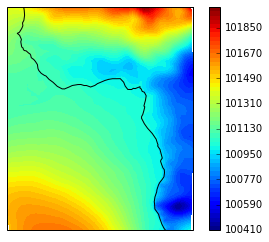

In [12]:
lons, lats = meshgrid(lon, lat)

# plot first time stepp:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
ax.coastlines()
cs = plt.contourf(lons, lats, psl[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='nearest')
plt.colorbar()

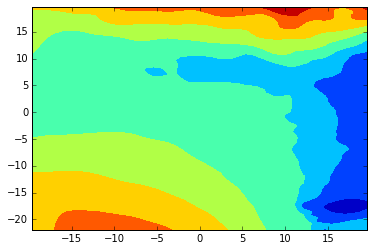

In [13]:
# cartopy puts it together how I would like to have it ;-) 
# simple plot shows the 'problem'
cs = plt.contourf(lons, lats, psl[0,:,:])

In [14]:
lat[:]

array([-21.94444203, -21.38888645, -20.83333087, -20.27777529,
       -19.72221971, -19.16666412, -18.61110854, -18.05555296,
       -17.49999738, -16.9444418 , -16.38888621, -15.83333063,
       -15.27777505, -14.72221947, -14.16666389, -13.6111083 ,
       -13.05555272, -12.49999714, -11.94444156, -11.38888597,
       -10.83333039, -10.27777481,  -9.72221923,  -9.16666365,
        -8.61110806,  -8.05555248,  -7.4999969 ,  -6.94444132,
        -6.38888574,  -5.83333015,  -5.27777457,  -4.72221899,
        -4.16666341,  -3.61110783,  -3.05555224,  -2.49999666,
        -1.94444108,  -1.3888855 ,  -0.83332992,  -0.27777433,
         0.27778125,   0.83333683,   1.38889241,   1.94444799,
         2.50000358,   3.05555916,   3.61111474,   4.16667032,
         4.7222259 ,   5.27778149,   5.83333707,   6.38889265,
         6.94444823,   7.50000381,   8.0555594 ,   8.61111498,
         9.16667056,   9.72222614,  10.27778172,  10.83333731,
        11.38889289,  11.94444847,  12.50000405,  13.05

In [15]:
from flyingpigeon import subset as sb

In [14]:
africa = sb.clipping(resource=resources, historical_concatination=True, 
            prefix='test_africa', spatial_wrapping='wrap', polygons='Africa', dir_output=HOME+'/data/tests/')

In [15]:
var = get_variable(africa[0])
#print 'variable name: %s' % var
ds = Dataset(africa[0])
psl = ds.variables[var]
lat = ds.variables['lat']
lon = ds.variables['lon']

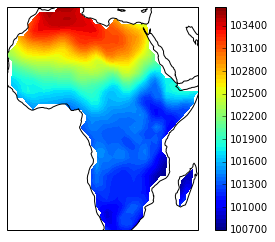

In [16]:
lons, lats = meshgrid(lon, lat)

# plot first time stepp:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
ax.coastlines()
cs = plt.contourf(lons, lats, psl[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='nearest')
plt.colorbar()

In [17]:
lon[:]

array([-16.875, -15.   , -13.125, -11.25 ,  -9.375,  -7.5  ,  -5.625,
        -3.75 ,  -1.875,   0.   ,   1.875,   3.75 ,   5.625,   7.5  ,
         9.375,  11.25 ,  13.125,  15.   ,  16.875,  18.75 ,  20.625,
        22.5  ,  24.375,  26.25 ,  28.125,  30.   ,  31.875,  33.75 ,
        35.625,  37.5  ,  39.375,  41.25 ,  43.125,  45.   ,  46.875,
        48.75 ,  50.625])

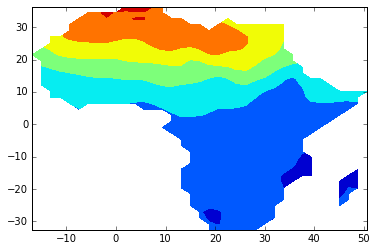

In [18]:
cs = plt.contourf(lons, lats, psl[0,:,:])

In [19]:
from flyingpigeon import utils
reload(sb)

res_rot = HOME+'/.conda/envs/birdhouse/var/lib/cache/pywps/esgf1.dkrz.de/thredds/fileServer/cordex/cordex/output/EUR-44/CLMcom/MPI-M-MPI-ESM-LR/historical/r1i1p1/CLMcom-CCLM4-8-17/v1/mon/tas/v20140520/tas_EUR-44_MPI-M-MPI-ESM-LR_historical_r1i1p1_CLMcom-CCLM4-8-17_v1_mon_200101-200512.nc' 

europe = sb.clipping(resource=res_rot, historical_concatination=True, memory_limit=1, 
            prefix='test_europe', spatial_wrapping='wrap', polygons='Europe', dir_output=HOME+'/data/tests/')
europe

ocgis module call compute with chunks
getting fill file...
geometry subset is present. calculating slice offsets...
getting tile schema shape inputs...
getting tile schema...
output file is: /home/nils/data/tests/test_europe.nc
tile count: 4
tiles progress: [----------------------------------------]########################################]
complete.


['/home/nils/data/tests/test_europe.nc']

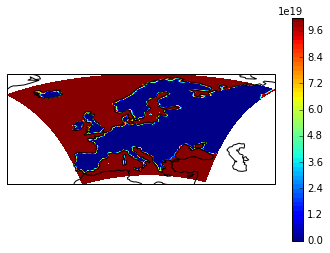

In [20]:
lats, lons = utils.unroate_pole(europe[0], write_to_file=False)
var = get_variable(europe[0])

ds = Dataset(europe[0])
val = np.squeeze(ds.variables[var])



# plot first time stepp:
ax = plt.axes(projection=ccrs.PlateCarree()) #Robinson(central_longitude=0)
ax.coastlines()
cs = plt.contourf(lons, lats, val[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='nearest',
                  )
plt.colorbar()
ds.close()

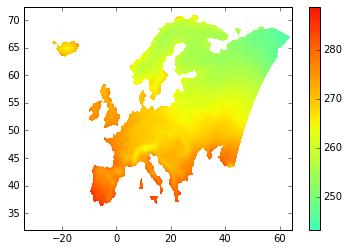

In [21]:
val_m = np.ma.array(val[:], mask=val[:] > 1000)
cs = plt.contourf(lons, lats, val_m[0,:,:], 60, vmin=200, vmax=300)
ticks = np.linspace(200,300, num=11, endpoint=True)
cb =plt.colorbar(ticks=ticks, )
cb.vmin=200
cb.vmax=300

In [22]:
ds = Dataset(europe[0])
val = np.squeeze(ds.variables[var])
